# Find All Customers With Duplicated Serial Numbers

Project Description: https://youtrack.geox.ws/issue/GR-218

# Import Modules

In [1]:
import os
import sys
import warnings
import numpy as np
import pandas as pd
from PIL import Image
from credentials import *
sys.path.append(project_path)
from urllib.request import urlopen
from Queries.medicus_queries import *
from ClassLibify.main import DataExtractor

# Options and Settings

In [2]:
warnings.simplefilter("ignore")
pd.set_option("expand_frame_repr", True)
np.set_printoptions(precision=4, suppress=True)

# Load Image

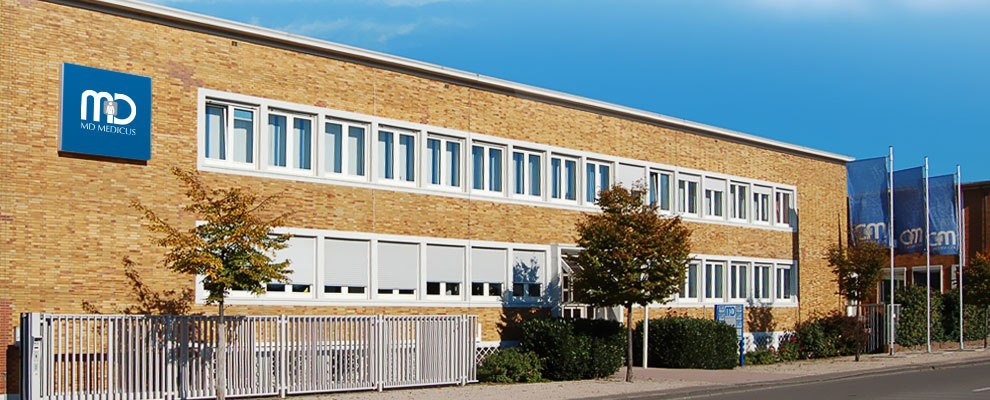

In [3]:
image_url = "https://www.md-medicus.net/sites/default/files/imagecache/page_teaser_full_width/page/teaser/impressum_0.jpg"
Image.open(fp=urlopen(f"{image_url}"))

# Fetch Data

Loads All Customers With Duplicated Serial Numbers

In [4]:
df_all = DataExtractor().get_data_repo_db(query1)
df_all.head()

device_type serial_number  serial_number_count  customer_id  \
0         GC4    GC4-003585                    2      1829412   
1         GC4    GC4-003585                    2      2229643   
2         GC5    GC5-003778                    2      1944448   
3         GC5    GC5-003778                    2      2296618   
4         GC5    GC5-009446                    2      2122883   

     customer_name  subscription_id  start_date    end_date monsum_status  \
0      Anne Jensen          1088386  2018-09-10        None        active   
1     Peter Knebel          1592837  2022-09-19  2024-02-28        active   
2  Christa Tondera          1195366  2019-02-06        None        active   
3    Petra Standop          1612791  2023-03-13  2024-02-28        active   
4    Werner Wagner          1369472  2020-06-12        None        active   

  opportunity_status redmine_ticket_status product  redmine_done_ratio  \
0                won                Closed   Mobil                 100   
1                won             Cancelled   Mobil                 100   
2                won                Closed   Mobil                 100   
3                won             Cancelled   Mobil                 100   
4                won             Cancelled   Mobil                 100   

  emergency_call_center  
0            MD Medicus  
1            MD Medicus  
2            MD Medicus  
3            MD Medicus  
4            MD Medicus

# Indexing and selecting data

Filter SM and SN Devices

In [5]:
df_sm_sn = df_all.query("device_type == 'SM' | device_type == 'SN'").reset_index(drop=True)
df_sm_sn.head()

device_type serial_number  serial_number_count  customer_id  \
0          SM   SM-07301880                    2      2153225   
1          SM   SM-07301880                    2      2374675   
2          SM   SM-07303117                    2      2155087   
3          SM   SM-07303117                    2      2386731   
4          SM   SM-07326174                    2      2177492   

      customer_name  subscription_id  start_date end_date monsum_status  \
0        Ruth Vogel          1402876  2021-02-22     None        active   
1  Christina Jäsche          1668276  2023-10-09     None        active   
2        Erika Lerm          1405023  2021-03-08     None        active   
3      Susanne Kühn          1682082  2023-12-05     None        active   
4    Ursula Knirsch          1431396  2021-09-06     None        active   

  opportunity_status redmine_ticket_status product  redmine_done_ratio  \
0                won                Closed   Basic                 100   
1                won                Closed   Basic                 100   
2                won                Closed   Basic                 100   
3                won                Closed   Basic                 100   
4                won                Closed   Basic                 100   

  emergency_call_center  
0            MD Medicus  
1            MD Medicus  
2            MD Medicus  
3            MD Medicus  
4            MD Medicus

Filter all devices not SM or SN

In [6]:
df_not_sm_sn = df_all.loc[~df_all["customer_id"].isin(df_sm_sn["customer_id"])]
df_not_sm_sn.head()

device_type serial_number  serial_number_count  customer_id  \
0         GC4    GC4-003585                    2      1829412   
1         GC4    GC4-003585                    2      2229643   
2         GC5    GC5-003778                    2      1944448   
3         GC5    GC5-003778                    2      2296618   
4         GC5    GC5-009446                    2      2122883   

     customer_name  subscription_id  start_date    end_date monsum_status  \
0      Anne Jensen          1088386  2018-09-10        None        active   
1     Peter Knebel          1592837  2022-09-19  2024-02-28        active   
2  Christa Tondera          1195366  2019-02-06        None        active   
3    Petra Standop          1612791  2023-03-13  2024-02-28        active   
4    Werner Wagner          1369472  2020-06-12        None        active   

  opportunity_status redmine_ticket_status product  redmine_done_ratio  \
0                won                Closed   Mobil                 100   
1                won             Cancelled   Mobil                 100   
2                won                Closed   Mobil                 100   
3                won             Cancelled   Mobil                 100   
4                won             Cancelled   Mobil                 100   

  emergency_call_center  
0            MD Medicus  
1            MD Medicus  
2            MD Medicus  
3            MD Medicus  
4            MD Medicus

# Check existing medicus customers with our data

Project Description: https://youtrack.geox.ws/issue/CRM-683

# Fetch Data

Load All Medicus Customers With Duplicated Serial Numbers

In [7]:
df_med_all = DataExtractor().get_data_repo_db(query2)
df_med_all.head()

device_type serial_number  serial_number_count  customer_id  \
0         GC4    GC4-003585                    2      1829412   
1         GC4    GC4-003585                    2      2229643   
2         GC5    GC5-003778                    2      1944448   
3         GC5    GC5-003778                    2      2296618   
4         GC5    GC5-009446                    2      2122883   

     customer_name  subscription_id  start_date    end_date monsum_status  \
0      Anne Jensen          1088386  2018-09-10        None        active   
1     Peter Knebel          1592837  2022-09-19  2024-02-28        active   
2  Christa Tondera          1195366  2019-02-06        None        active   
3    Petra Standop          1612791  2023-03-13  2024-02-28        active   
4    Werner Wagner          1369472  2020-06-12        None        active   

  opportunity_status redmine_ticket_status product  redmine_done_ratio  \
0                won                Closed   Mobil                 100   
1                won             Cancelled   Mobil                 100   
2                won                Closed   Mobil                 100   
3                won             Cancelled   Mobil                 100   
4                won             Cancelled   Mobil                 100   

  emergency_call_center  
0            MD Medicus  
1            MD Medicus  
2            MD Medicus  
3            MD Medicus  
4            MD Medicus

# Indexing and Selecting Data

Filter SM and SN Devices

In [8]:
df_med_sm_sn = df_med_all.query("device_type == 'SM' | device_type == 'SN'").reset_index(drop=True)
df_med_sm_sn.head()

device_type serial_number  serial_number_count  customer_id  \
0          SM   SM-07301880                    2      2153225   
1          SM   SM-07301880                    2      2374675   
2          SM   SM-07303117                    2      2155087   
3          SM   SM-07303117                    2      2386731   
4          SM   SM-07326174                    2      2177492   

      customer_name  subscription_id  start_date end_date monsum_status  \
0        Ruth Vogel          1402876  2021-02-22     None        active   
1  Christina Jäsche          1668276  2023-10-09     None        active   
2        Erika Lerm          1405023  2021-03-08     None        active   
3      Susanne Kühn          1682082  2023-12-05     None        active   
4    Ursula Knirsch          1431396  2021-09-06     None        active   

  opportunity_status redmine_ticket_status product  redmine_done_ratio  \
0                won                Closed   Basic                 100   
1                won                Closed   Basic                 100   
2                won                Closed   Basic                 100   
3                won                Closed   Basic                 100   
4                won                Closed   Basic                 100   

  emergency_call_center  
0            MD Medicus  
1            MD Medicus  
2            MD Medicus  
3            MD Medicus  
4            MD Medicus

Filter All Devices Not SM or SN

In [9]:
df_med_not_sm_sn = df_med_all.loc[~df_med_all["customer_id"].isin(df_med_sm_sn["customer_id"])]
df_med_not_sm_sn.head()

device_type serial_number  serial_number_count  customer_id  \
0         GC4    GC4-003585                    2      1829412   
1         GC4    GC4-003585                    2      2229643   
2         GC5    GC5-003778                    2      1944448   
3         GC5    GC5-003778                    2      2296618   
4         GC5    GC5-009446                    2      2122883   

     customer_name  subscription_id  start_date    end_date monsum_status  \
0      Anne Jensen          1088386  2018-09-10        None        active   
1     Peter Knebel          1592837  2022-09-19  2024-02-28        active   
2  Christa Tondera          1195366  2019-02-06        None        active   
3    Petra Standop          1612791  2023-03-13  2024-02-28        active   
4    Werner Wagner          1369472  2020-06-12        None        active   

  opportunity_status redmine_ticket_status product  redmine_done_ratio  \
0                won                Closed   Mobil                 100   
1                won             Cancelled   Mobil                 100   
2                won                Closed   Mobil                 100   
3                won             Cancelled   Mobil                 100   
4                won             Cancelled   Mobil                 100   

  emergency_call_center  
0            MD Medicus  
1            MD Medicus  
2            MD Medicus  
3            MD Medicus  
4            MD Medicus

# Find All Customers From MD Medicus Call Center

Project Description: https://youtrack.geox.ws/issue/CRM-683

In [10]:
df_med_db = DataExtractor().get_data_repo_db(query3)
df_med_db.head()

kunden_id   abo_id   abo_start abo_status          name    vorname  \
0    2396527  1695157  2024-02-01      trial        Bonnes     Dieter   
1    2396510  1695140  2024-02-01      trial         Puder      Horst   
2    2396522  1695152  2024-02-01      trial   Schlenkrich      Bernd   
3    2396519  1695149  2024-02-01      trial  Engelbrecher     Ursula   
4    2396515  1695145  2024-02-01      trial       Hoymann  Christine   

                adresse    plz         ort redmine_ticket_number  \
0      Rostocker Str. 7  31141  Hildesheim                         
1         Gartenstr. 12  03149       Forst                         
2  Bernsdorfer Str. 119  09126    Chemnitz                         
3      Abendrothsweg 36  20251     Hamburg                         
4         Büngerstr. 28  40597  Düsseldorf                         

  redmine_status  progress device_type serial_number product  \
0           None        60        None          None   Basic   
1           None        60        None          None   Basic   
2           None        60        None          None   Basic   
3           None        60        None          None   Basic   
4           None        40        None          None    Home   

  emergency_call_center  
0            MD Medicus  
1            MD Medicus  
2            MD Medicus  
3            MD Medicus  
4            MD Medicus

Load Medicus Export Data From Philipp Kollmansberger

In [11]:
df_med = pd.read_excel(os.path.join(os.getcwd(), "Datasets", "Medicus Kunden.xlsx"))
df_med.columns = [col.replace(" ", "_") for col in df_med.columns]
df_med.columns = [col.replace(".", "") for col in df_med.columns]
# df_med = df_med.dropna(how='all').reset_index(drop=True)
df_med.head()

Name      Vorname            Adresse    PLZ     Ort  Teilnahme_ab  \
0      NaN          NaN                NaN    NaN     NaN           NaN   
1      NaN          NaN                NaN    NaN     NaN           NaN   
2      NaN          NaN                NaN    NaN     NaN           NaN   
3  Schmidt  Heide Marie  Flughafen Str. 66  12045  Berlin     3112019.0   
4      Alt       Renate       Lindenstr  2  18574    Garz     8112018.0   

   Ticket_No   Geräte_ID Serial_No   Simkarte_ID  
0        NaN         NaN       NaN           NaN  
1        NaN         NaN       NaN           NaN  
2        NaN         NaN       NaN           NaN  
3   120322.0  90001328.0   7925306  8.949020e+19  
4    71647.0  90000009.0   7971981  8.949020e+19

Check Duplicates For All Surname, First Name and Postal Code

In [12]:
df_med.groupby(by=["Name", "Vorname", "PLZ"]).count().query("Adresse > 1").reset_index().head()

Name       Vorname    PLZ  Adresse  Ort  Teilnahme_ab  Ticket_No  \
0  Aschenbach      Brigitte  15868        2    2             2          2   
1        Baur         Eugen  88094        2    2             2          2   
2      Becker  Lutz Joachim  35794        2    2             2          2   
3        Bock     Christine  32657        2    2             2          2   
4    Bringezu     Hildegard   6779        2    2             2          2   

   Geräte_ID  Serial_No  Simkarte_ID  
0          1          1            0  
1          2          2            2  
2          2          2            2  
3          1          1            0  
4          2          2            1

In [13]:
cols_to_drop = ["Ort", "Teilnahme_ab", "Ticket_No",	"Geräte_ID",	"Serial_No", "Simkarte_ID", "Adresse"]

grpd = df_med.groupby(by=["Name", "Vorname", "PLZ"]).count().query("Adresse > 1").reset_index()
grpd = grpd.drop(columns=cols_to_drop)
grpd.head()

Name       Vorname    PLZ
0  Aschenbach      Brigitte  15868
1        Baur         Eugen  88094
2      Becker  Lutz Joachim  35794
3        Bock     Christine  32657
4    Bringezu     Hildegard   6779

Merge Medicus Customers Data With Grouped Data

In [14]:
duplicate_customers = df_med.merge(grpd, on=["Name", "Vorname", "PLZ"])
duplicate_customers.head()

Name   Vorname                    Adresse    PLZ         Ort  \
0    Schult  Wolfgang        Wolgasterstraße 21b  17489  Greifswald   
1    Schult  Wolfgang        Wolgasterstraße 21b  17489  Greifswald   
2  Harrison      Inge  Tangstedter Landstr. 122b  22415     Hamburg   
3  Harrison      Inge  Tangstedter Landstr. 122b  22415     Hamburg   
4    Dohmen     Horst              Hermannstr. 7  56564     Neuwied   

   Teilnahme_ab  Ticket_No     Geräte_ID   Serial_No   Simkarte_ID  
0     6042023.0    77994.0  4.671910e+14  GC5-034135           NaN  
1     7042023.0    77994.0  4.671910e+14  GC5-034135           NaN  
2     1062021.0   191102.0  9.000052e+08     7386854  8.931440e+19  
3    10052021.0   191108.0  9.000052e+08     7386854  8.931440e+19  
4    14122020.0   167469.0  9.000048e+07     7992096  8.949020e+19

Check Duplicated Ticket Numbers

In [15]:
dup_ticket_no = duplicate_customers.loc[duplicate_customers.duplicated(subset=["Name", "Vorname", "PLZ", "Ticket_No"])]
dup_ticket_no = df_med.merge(dup_ticket_no[["Name", "Vorname"]], on=["Name", "Vorname"], how="inner")
dup_ticket_no.head()

Name    Vorname              Adresse    PLZ         Ort  Teilnahme_ab  \
0    Schult   Wolfgang  Wolgasterstraße 21b  17489  Greifswald     6042023.0   
1    Schult   Wolfgang  Wolgasterstraße 21b  17489  Greifswald     7042023.0   
2  Piasecki  Elisabeth    Kolberger Str. 52  51381  Leverkusen    31052023.0   
3  Piasecki  Elisabeth    Kolberger Str. 52  51381  Leverkusen    31052023.0   
4  Piasecki  Elisabeth    Kolberger Str. 52  51381  Leverkusen    31052023.0   

   Ticket_No     Geräte_ID   Serial_No   Simkarte_ID  
0    77994.0  4.671910e+14  GC5-034135           NaN  
1    77994.0  4.671910e+14  GC5-034135           NaN  
2   296918.0  9.000041e+08     7384826  8.931440e+19  
3   296918.0  9.000041e+08     7384826  8.931440e+19  
4   296918.0  9.000041e+08     7384826  8.931440e+19

Check Duplicated Device Ids

In [16]:
dup_device_id = duplicate_customers.loc[duplicate_customers.duplicated(subset=["Name", "Vorname", "PLZ", "Geräte_ID"])].reset_index(drop=True)
dup_device_id = df_med.merge(dup_device_id[["Name", "Vorname"]], on=["Name", "Vorname"], how="inner")
dup_device_id.head()

Name       Vorname                    Adresse    PLZ          Ort  \
0    Schult      Wolfgang        Wolgasterstraße 21b  17489   Greifswald   
1    Schult      Wolfgang        Wolgasterstraße 21b  17489   Greifswald   
2  Harrison          Inge  Tangstedter Landstr. 122b  22415      Hamburg   
3  Harrison          Inge  Tangstedter Landstr. 122b  22415      Hamburg   
4  Hienzsch  Klaus-Dieter              Küchlerweg 68   1979  Lauchhammer   

   Teilnahme_ab  Ticket_No     Geräte_ID   Serial_No   Simkarte_ID  
0     6042023.0    77994.0  4.671910e+14  GC5-034135           NaN  
1     7042023.0    77994.0  4.671910e+14  GC5-034135           NaN  
2     1062021.0   191102.0  9.000052e+08     7386854  8.931440e+19  
3    10052021.0   191108.0  9.000052e+08     7386854  8.931440e+19  
4     7092021.0   212072.0  9.000061e+08     7390602  8.931440e+19

Filter Customers With Missing Ticket Numbers

In [17]:
df_na_ticket_no = df_med.query("Ticket_No.isnull()").reset_index(drop=True)
df_na_ticket_no.head()

Name Vorname Adresse  PLZ  Ort  Teilnahme_ab  Ticket_No  Geräte_ID  \
0  NaN     NaN     NaN  NaN  NaN           NaN        NaN        NaN   
1  NaN     NaN     NaN  NaN  NaN           NaN        NaN        NaN   
2  NaN     NaN     NaN  NaN  NaN           NaN        NaN        NaN   
3  NaN     NaN     NaN  NaN  NaN           NaN        NaN        NaN   
4  NaN     NaN     NaN  NaN  NaN           NaN        NaN        NaN   

  Serial_No  Simkarte_ID  
0       NaN          NaN  
1       NaN          NaN  
2       NaN          NaN  
3       NaN          NaN  
4       NaN          NaN

Filter Customers With Missing Device Id's

In [18]:
df_na_device_id = df_med.query("Geräte_ID.isnull()").reset_index(drop=True)
df_na_device_id.head()

Name Vorname Adresse  PLZ  Ort  Teilnahme_ab  Ticket_No  Geräte_ID  \
0  NaN     NaN     NaN  NaN  NaN           NaN        NaN        NaN   
1  NaN     NaN     NaN  NaN  NaN           NaN        NaN        NaN   
2  NaN     NaN     NaN  NaN  NaN           NaN        NaN        NaN   
3  NaN     NaN     NaN  NaN  NaN           NaN        NaN        NaN   
4  NaN     NaN     NaN  NaN  NaN           NaN        NaN        NaN   

  Serial_No  Simkarte_ID  
0       NaN          NaN  
1       NaN          NaN  
2       NaN          NaN  
3       NaN          NaN  
4       NaN          NaN

# Write Output

In [19]:
with pd.ExcelWriter(os.path.join(task_output, "MD Medicus.xlsx"), engine="openpyxl") as writer:
  df_sm_sn.to_excel(writer, sheet_name="Duplizierte SM- oder SN-Geräte", index=False)
  df_not_sm_sn.to_excel(writer, sheet_name="Duplizierte Nicht-SM- oder SN-Geräte", index=False)
  df_med_sm_sn.to_excel(writer, sheet_name="MD Medicus Duplizierte SM- oder SN-Geräte", index=False)
  df_med_not_sm_sn.to_excel(writer, sheet_name="MD Medicus nicht duplizierte SM oder SN Geräte", index=False)
  df_med_db.to_excel(writer, sheet_name="Libify Datenbank", index=False)
  df_med.to_excel(writer, sheet_name="Medicus-Daten", index=False)  
  duplicate_customers.to_excel(writer, sheet_name="Duplizierte Kunden", index=False)
  dup_ticket_no.to_excel(writer, sheet_name="Duplizierte Ticketnummer", index=False)
  df_na_ticket_no.to_excel(writer, sheet_name="Fehlende Ticketnummern", index=False)
  df_na_device_id.to_excel(writer, sheet_name="Fehlende Geräte-ID", index=False)